# Gradient Descent

Gradient Descent is an algorithm that finds the local extrema of a function. This is applicable to machine learning, because we want to find the optimal parameters that minimize our loss function. In machine learning, loss functions quantify the amount of error between the predicted values from a machine learning model and the actual expected values. In this notebook, we will perform linear regression by using gradient descent to find the optimal slope and y-intercept. 

## Deriving Mathematical Formulas

Importing the libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, Latex, Image
from sympy import Derivative, Indexed, Sum, init_printing, lambdify, symbols, latex
from celluloid import Camera

init_printing()

We will use the mean squared error function as our loss function.
$$ MSE = \frac{1}{n} \sum_{i=1}^{n}(y_{i}-\hat{y})^2 $$

Now, let's represent the mean squared error function in our code using the SymPy library.

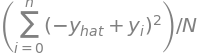

In [2]:
x, y, n, N, y_hat, w, b, i = symbols("x y n N y_hat w b i")
x_i = Indexed("x", i)
y_i = Indexed("y", i)

s = 1 / N * Sum((y_i - y_hat) ** 2, (i, 0, n))
display(s)

Since we are implementing a linear regression model, where $\hat{y} = w x + b$, we can update our mean squared error function by substituting $\hat{y}$ with $w x + b$.

$$ MSE = \frac{1}{n} \sum_{i=1}^{n}(y_{i}-(w x_{i} + b))^2 $$

Let's also update our SymPy representation of the loss function in the code.

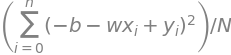

In [3]:
s = s.subs(y_hat, w * x_i + b)
display(s)

In each epoch of gradient descent, a parameter is updated by subtracting the product of the gradient of the function and the learning rate ($lr$). The learning rate controls how much the parameters should change. Small learning rates are precise, but are slow. Large learning rates are fast, but may prevent the model from finding the local extrema.
$$ X_{n+1} = X_n - lr * \frac{\partial}{\partial X} f(X_n)$$

Since we are finding the optimal slope ($w$) and y-intercept ($b$) for our linear regression model, we must find the partial derivatives of the loss function with respect to $w$ and $b$.

$$ \frac{\partial }{\partial w} \left( MSE \right) = \frac{1}{n} \sum_{i=1}^{n}-2x_{i}(y_{i}-(w x_{i} + b)) $$
$$ \frac{\partial}{\partial b} \left( MSE \right) =  \frac{1}{n} \sum_{i=1}^{n}=-2(y_{i}-(w x_{i} + b)) $$

Let's find the partial derivatives of the loss function in our code.

In [4]:
deriv_dsdb = Derivative(s, b)
dsdb = deriv_dsdb.doit()
display(Latex("$${} = {}$$".format(latex(deriv_dsdb), latex(dsdb))))

deriv_dsdw = Derivative(s, w)
dsdw = deriv_dsdw.doit()
display(Latex("$${} = {}$$".format(latex(deriv_dsdw), latex(dsdw))))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Now that we have derived all of the formulas, let's turn these SymPy objects into Python functions that we can call.

In [5]:
f = lambdify([x, y, w, b, n, N], s)
dsdb_f = lambdify([x, y, w, b, n, N], dsdb)
dsdw_f = lambdify([x, y, w, b, n, N], dsdw)

In [6]:
# Double check that our MSE function is working
A = np.array([1, 2, 3, 4])
B = np.array([5, 10, 4, 12])

print("MSE", np.square(np.subtract(A, B)).mean())
print("MSE", f(A, B, 1, 0, A.size - 1, A.size))

MSE 36.25
MSE 36.25
